In [1]:
import pandas as pd

In [2]:
trans = pd.read_csv("../../DataPlus/all_transcripts.csv")

In [3]:
import CompilingCorpus as cc

In [94]:
compile_corpus = cc.compile_convos(trans)

In [5]:
import Preprocessing as pre

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\grant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [84]:
CUSTOM_STOPWORDS = ['pt', 'md', 'ok', 'yeah', 'okay', 'um', 'uh', 'oth', 'inaudible', 'na', 'dr', 'unintelligible', 'laugh', 'ah', 'gon', 'mmhmm']

In [122]:
# FREQUENT_WORDS = ['cancer', 'prostate']

In [123]:
PROCESS_PIPELINE = [
    pre.remove_non_alpha,
    pre.remove_parentheses,
    pre.make_lowercase,
    pre.remove_stopwords,
    lambda x: pre.remove_stopwords(x, CUSTOM_STOPWORDS),
    pre.lemmatize
]

In [124]:
pre_corpus = pre.process_corpus(compile_corpus, PROCESS_PIPELINE)

HBox(children=(IntProgress(value=0, max=526), HTML(value='')))

## Making Bigrams

In [101]:
import gensim

In [125]:
bigram = gensim.models.Phrases(clean_corpus, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [126]:
clean_corpus = [bigram_mod[text] for text in pre_corpus] 

## Creating Word Dictionary

In [93]:
from pprint import pprint

In [56]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [57]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [113]:
id2word = corpora.Dictionary(clean_corpus)
corpus = [id2word.doc2bow(text) for text in clean_corpus]

In [121]:
print(id2word)

Dictionary(12823 unique tokens: ['abnormal', 'active', 'active_surveillance', 'aggressive', 'ahead']...)


In [112]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abnormal', 2),
  ('active', 1),
  ('active_surveillance', 4),
  ('aggressive', 5),
  ('ahead', 1),
  ('ahh', 1),
  ('almost', 1),
  ('another', 1),
  ('anymore', 1),
  ('anyone', 1),
  ('anything', 2),
  ('appear', 2),
  ('appearance', 3),
  ('appointment', 1),
  ('area', 1),
  ('around', 2),
  ('away', 1),
  ('base', 2),
  ('basically', 1),
  ('best', 3),
  ('biopsy', 5),
  ('blood', 1),
  ('bone', 2),
  ('bring', 2),
  ('call', 3),
  ('cancer', 2),
  ('category', 4),
  ('cell', 2),
  ('center', 1),
  ('certainly', 1),
  ('chance', 2),
  ('change', 1),
  ('check', 2),
  ('clinic', 1),
  ('come', 1),
  ('coming', 1),
  ('common', 4),
  ('computer', 1),
  ('consider', 1),
  ('control', 1),
  ('core', 5),
  ('could', 4),
  ('cure', 2),
  ('cuz', 1),
  ('delay', 1),
  ('design', 1),
  ('diabetes', 1),
  ('disease', 1),
  ('dying', 1),
  ('educational', 1),
  ('eight_nine', 1),
  ('either', 1),
  ('end', 1),
  ('enough', 5),
  ('er', 1),
  ('erectile', 1),
  ('even', 4),
  ('exam', 1),

## Gensim LDA Model

In [21]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,)

In [22]:
pprint(lda_model.print_topics())

[(0,
  '0.024*"know" + 0.018*"get" + 0.017*"radiation" + 0.016*"prostate" + '
  '0.016*"cancer" + 0.014*"surgery" + 0.013*"right" + 0.012*"go" + '
  '0.010*"would" + 0.010*"like"'),
 (1,
  '0.027*"know" + 0.018*"prostate" + 0.016*"right" + 0.015*"get" + '
  '0.014*"surgery" + 0.012*"like" + 0.011*"cancer" + 0.011*"radiation" + '
  '0.010*"think" + 0.010*"one"'),
 (2,
  '0.022*"know" + 0.017*"right" + 0.016*"cancer" + 0.016*"prostate" + '
  '0.014*"like" + 0.012*"radiation" + 0.012*"get" + 0.012*"would" + '
  '0.010*"think" + 0.010*"surgery"'),
 (3,
  '0.029*"know" + 0.017*"cancer" + 0.016*"prostate" + 0.016*"right" + '
  '0.014*"would" + 0.012*"like" + 0.012*"get" + 0.011*"think" + '
  '0.011*"radiation" + 0.010*"surgery"'),
 (4,
  '0.026*"know" + 0.016*"prostate" + 0.015*"right" + 0.014*"radiation" + '
  '0.014*"cancer" + 0.012*"would" + 0.012*"get" + 0.012*"like" + '
  '0.010*"surgery" + 0.009*"think"')]


In [24]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_corpus, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.736798278134765

Coherence Score:  0.24745098430281093


## LDA Mallet

In [59]:
mallet_path = 'C:/mallet-2.0.8/bin/mallet'

In [60]:
import os

In [61]:
os.environ.update({'MALLET_HOME': r'c:/mallet-2.0.8'})

In [127]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [128]:
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('surgery', 0.03939684610367187),
   ('kind', 0.018179027740475005),
   ('people', 0.012492805893412116),
   ('time', 0.012124467636112496),
   ('treatment', 0.00963818439934006),
   ('radiation', 0.008794075893028431),
   ('control', 0.008725012469784752),
   ('bit', 0.008256915934466485),
   ('function', 0.00812646280167287),
   ('urinary', 0.00768906112112957)]),
 (1,
  [('biopsy', 0.039776460530870916),
   ('psa', 0.026656587137295906),
   ('risk', 0.02612670533626299),
   ('years', 0.019640952091620097),
   ('low', 0.017938265237634324),
   ('month', 0.01524646568838711),
   ('treatment', 0.0150627733306957),
   ('make', 0.012872595219759645),
   ('option', 0.01278074904091394),
   ('year', 0.012307387965324535)]),
 (2,
  [('radiation', 0.05500908566640915),
   ('treatment', 0.02568468929197088),
   ('phi', 0.01447178002894356),
   ('remove', 0.014259599795436492),
   ('men', 0.013427200417831844),
   ('side', 0.013231341740748397),
   ('surgery', 0.011571983504346975),
  

In [74]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=clean_corpus, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.3319925424754582


In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [129]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=clean_corpus, start=5, limit=10, step=1)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

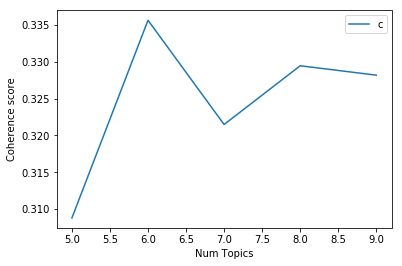

In [130]:
limit=10; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [77]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.3149
Num Topics = 6  has Coherence Value of 0.3558
Num Topics = 7  has Coherence Value of 0.3454
Num Topics = 8  has Coherence Value of 0.3458
Num Topics = 9  has Coherence Value of 0.3631


In [81]:
optimal_model = model_list[1]

In [83]:
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.054*"radiation" + 0.033*"prostate" + 0.022*"treatment" + 0.016*"cancer" + '
  '0.013*"side" + 0.013*"surgery" + 0.012*"men" + 0.012*"phi" + '
  '0.011*"effects" + 0.011*"remove"'),
 (1,
  '0.062*"surgery" + 0.027*"kind" + 0.024*"radiation" + 0.019*"people" + '
  '0.018*"week" + 0.014*"back" + 0.014*"time" + 0.014*"prostate" + '
  '0.011*"things" + 0.010*"bladder"'),
 (2,
  '0.045*"prostate" + 0.042*"biopsy" + 0.036*"cancer" + 0.025*"psa" + '
  '0.018*"surveillance" + 0.017*"time" + 0.017*"active" + 0.015*"low" + '
  '0.014*"kind" + 0.014*"month"'),
 (3,
  '0.054*"cancer" + 0.023*"prostate" + 0.023*"treatment" + 0.015*"risk" + '
  '0.015*"men" + 0.015*"years" + 0.013*"urinary" + 0.012*"gleason" + '
  '0.011*"option" + 0.011*"patient"'),
 (4,
  '0.053*"remove" + 0.048*"phi" + 0.029*"good" + 0.023*"laugh" + '
  '0.015*"alright" + 0.013*"back" + 0.010*"problem" + 0.008*"ya" + '
  '0.008*"feel" + 0.008*"check"'),
 (5,
  '0.039*"cancer" + 0.038*"surgery" + 0.032*"prostate" + 0.031*